Old -   

New -  


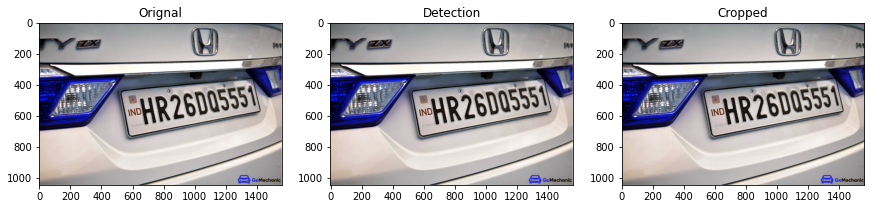

Old -  MH12DE1433
 

New -  MH12DE1433


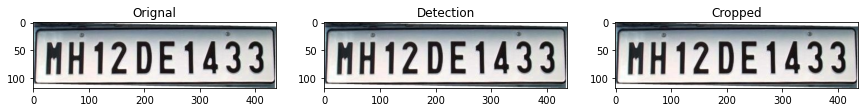

Old -  HHO TAVS886I
 

New -  HHOTAVS886I


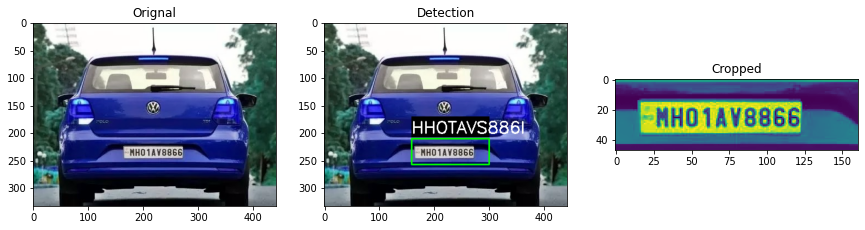

Old -  71 BH 0001 AA P
 

New -  71BH0001AAP


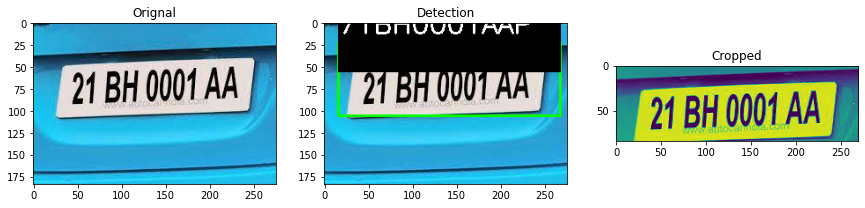

Old -  ——— a

= TESLA.COM
 

New -  aTESLACOM


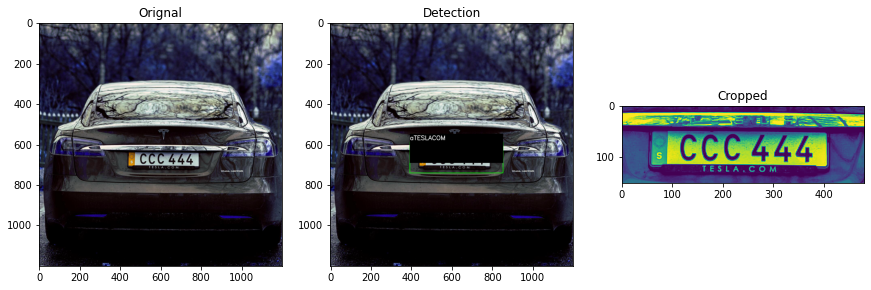

Old -  # ML OS S 7595
 

New -  MLOSS7595


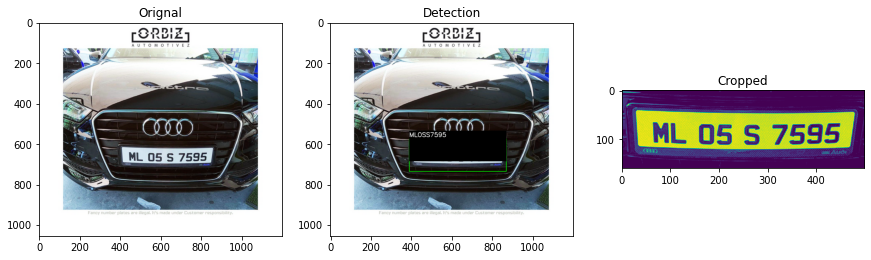

Old -  MH 131 BN 8454 .
 

New -  MH131BN8454


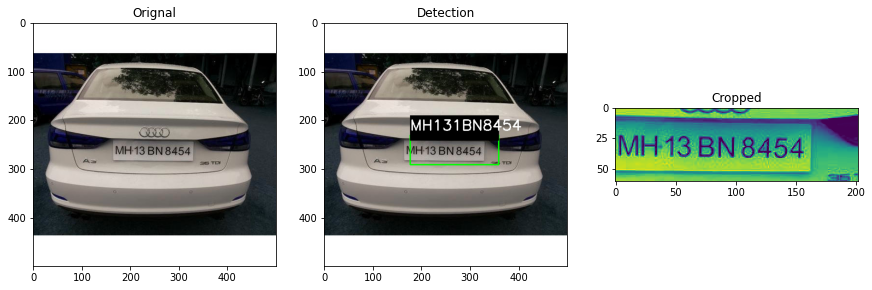

Old -  a”
 

New -  a


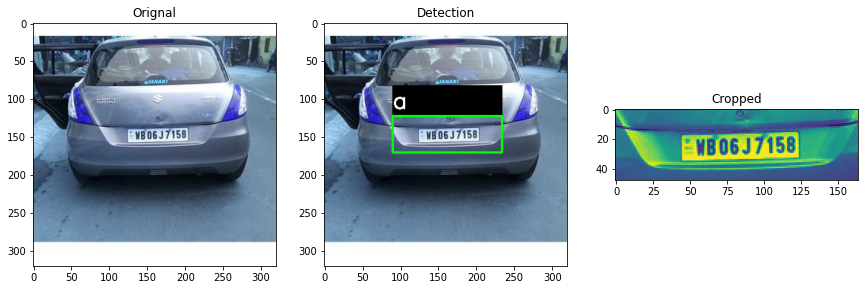

Old -  =MH20DV2366]|
 

New -  MH20DV2366


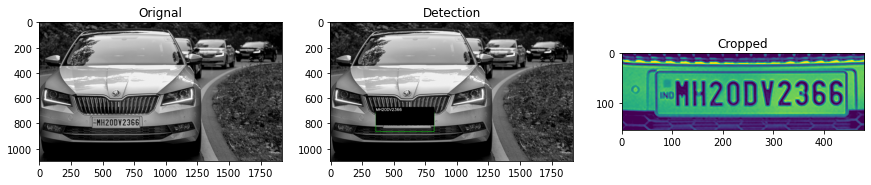

Old -   

New -  


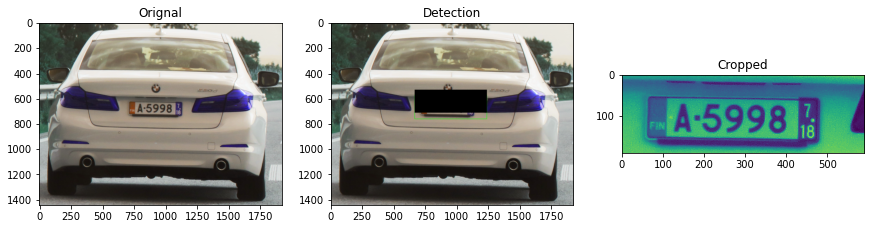

Old -   

New -  


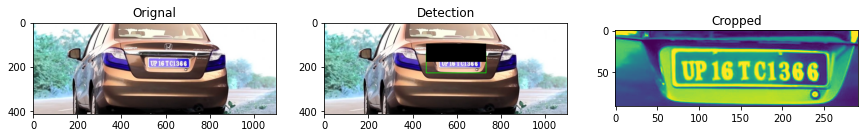

Old -  =e Ee

[MH 20 BY ser d

 

New -  eEeMH20BYserd


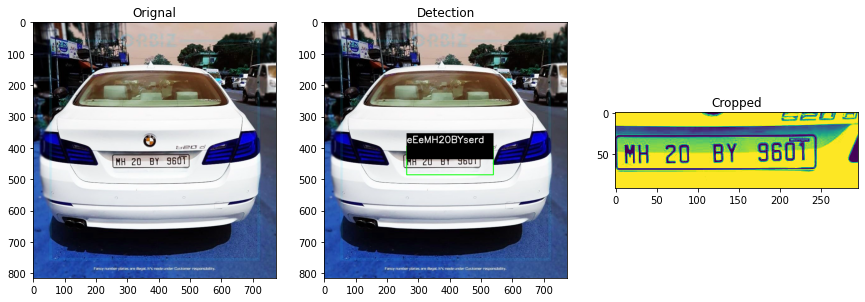

Old -   

New -  feam:-

faba LS



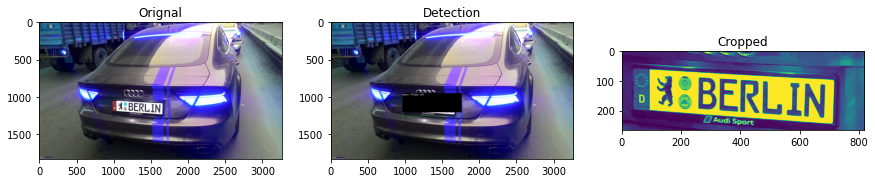

Old -  04 CC 4A 0001
 

New -  04CC4A0001


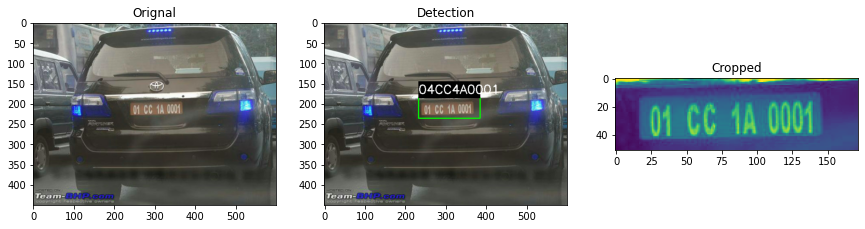

Old -  L 63 100) 8
Gi &

————<$<—_—
 

New -  L631008Gi


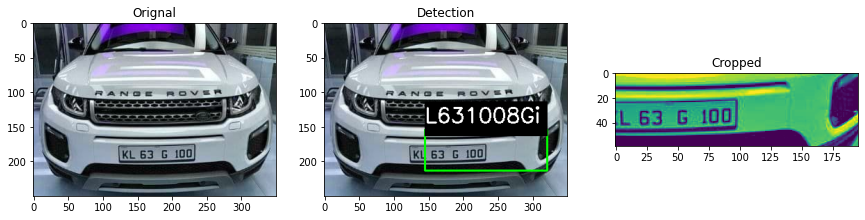

In [1]:
from PIL import Image, ImageEnhance
from pytesseract import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils


#Define path to tessaract.exe
path_to_tesseract = r'C:\Users\Admin\AppData\Local\Tesseract-OCR\tesseract.exe'
#%matplotlib inline
#-----Main------
#Define path to image

for k in range(2,17):
    f_path = "C:/Users/Admin/img/" + str(k) + ".jpg"
    #f_path = r"C:\Users\Admin\img\7.jpg"
    i = cv2.imread(f_path)
    im = Image.open(f_path)

    enhancer = ImageEnhance.Contrast(im)
    factor = 1.25 #increase contrast
    im = enhancer.enhance(factor)
    im.save('ocr.png',dpi=(300,300))
    image = cv2.imread('ocr.png')

    #---Resizing The Image---
    #image = cv2.resize(image, (500,250))
    #i = cv2.resize(i, (500,250))

    #---Orignal Image---

    plt.figure(figsize=(20, 20))
    plt.subplot(1,4,1)
    plt.title("Orignal")
    plt.imshow(i)



    #---Grayscle----
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)



    #---Dection---
    lplate_data = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    found = lplate_data.detectMultiScale(image)
    #print(found)
    if len(found)!=0:
        w1 = 0
        h1 = 0
        for (x,y,w,h) in found:
            if w>w1 and h>h1:
                w1 = w 
                x1 = x
                y1 = y
                h1 = h
            else:
                break
        cv2.rectangle(i, (x1,y1), (x1+w1, y1+h1), (0,255,0), 2)
        cv2.rectangle(i, (x1,y1-40), (x1+w1, y1+h1-50), (0,0,0), -1)
        

        #---Cropping---
        image = image[y1:(y1+h1),x1-10:(x1+w1)+10]

    else:
        image = i


    plt.subplot(1,4,3)
    plt.title("Cropped")
    plt.imshow(image)



    #Extract text from image
    text = pytesseract.image_to_string(image)
    Old = text
    print('Old - ',Old,'\n')
    text = ''.join(e for e in text if e.isalnum())
    start = text[0:2]

    if text.isalnum() == True:
        print('New - ',text)
    else:
        text = pytesseract.image_to_string(i)
        #text = ''.join(e for e in text if e.isalnum())
        print('New - ',text)
        
    if len(found)!=0:
        w1 = 0
        h1 = 0
        for (x,y,w,h) in found:
            if w>w1 and h>h1:
                w1 = w 
                x1 = x
                y1 = y
                h1 = h
            else:
                break
        cv2.putText(i, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    plt.subplot(1,4, 2)
    plt.title("Detection")
    plt.imshow(i)

    

    plt.show()


